<a href="https://colab.research.google.com/github/mhieu2001/LoanPrediction/blob/main/LRLoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# from google.colab import files
# uploaded = files.upload()

Saving loanfile.csv to loanfile (1).csv


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **READ AND EXPLORARY ANALYSIS**

In [45]:
df = pd.read_csv('loanfile.csv')
df2 = pd.read_csv('loanfile.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [47]:
df.shape

(614, 13)

In [48]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
df.dropna(inplace=True)

In [82]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,5291.911439,1590.699114,145.518139,341.955720,0.850949
std,5506.461371,2543.801628,81.749385,65.441582,0.341329
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3848.000000,1149.000000,129.500000,360.000000,1.000000
75%,5820.500000,2281.000000,167.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


In [52]:
# prompt: KNNImputer for LoanAmount and Credit History

from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)

df2[['LoanAmount', 'Credit_History']] = knn.fit_transform(df2[['LoanAmount', 'Credit_History']])


In [53]:
df2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
df2.dropna(inplace=True)

In [84]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,5291.911439,1590.699114,144.991144,341.955720,0.850554
std,5506.461371,2543.801628,82.006146,65.441582,0.343557
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3848.000000,1149.000000,126.500000,360.000000,1.000000
75%,5820.500000,2281.000000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


<ipython-input-85-54d31bc68807>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'], bins=50, ax=ax[0])
<ipython-input-85-54d31bc68807>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['LoanAmount'], bins=50, ax=ax[1])


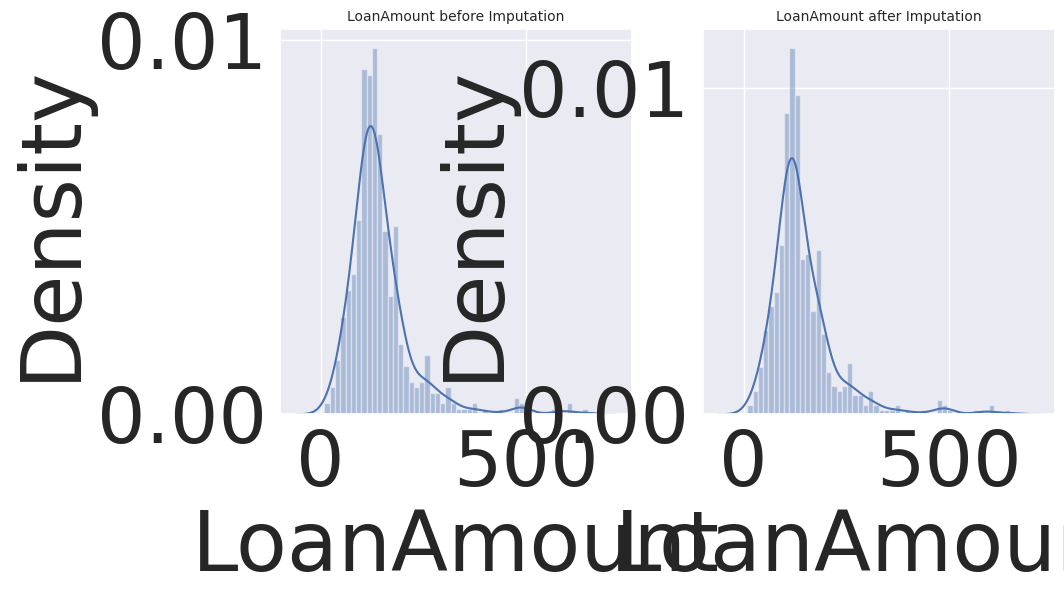

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.distplot(df['LoanAmount'], bins=50, ax=ax[0])
ax[0].set_title('LoanAmount before Imputation',size=10)

sns.distplot(df2['LoanAmount'], bins=50, ax=ax[1])
ax[1].set_title('LoanAmount after Imputation',size=10)

plt.show()

<Axes: xlabel='Property_Area', ylabel='count'>

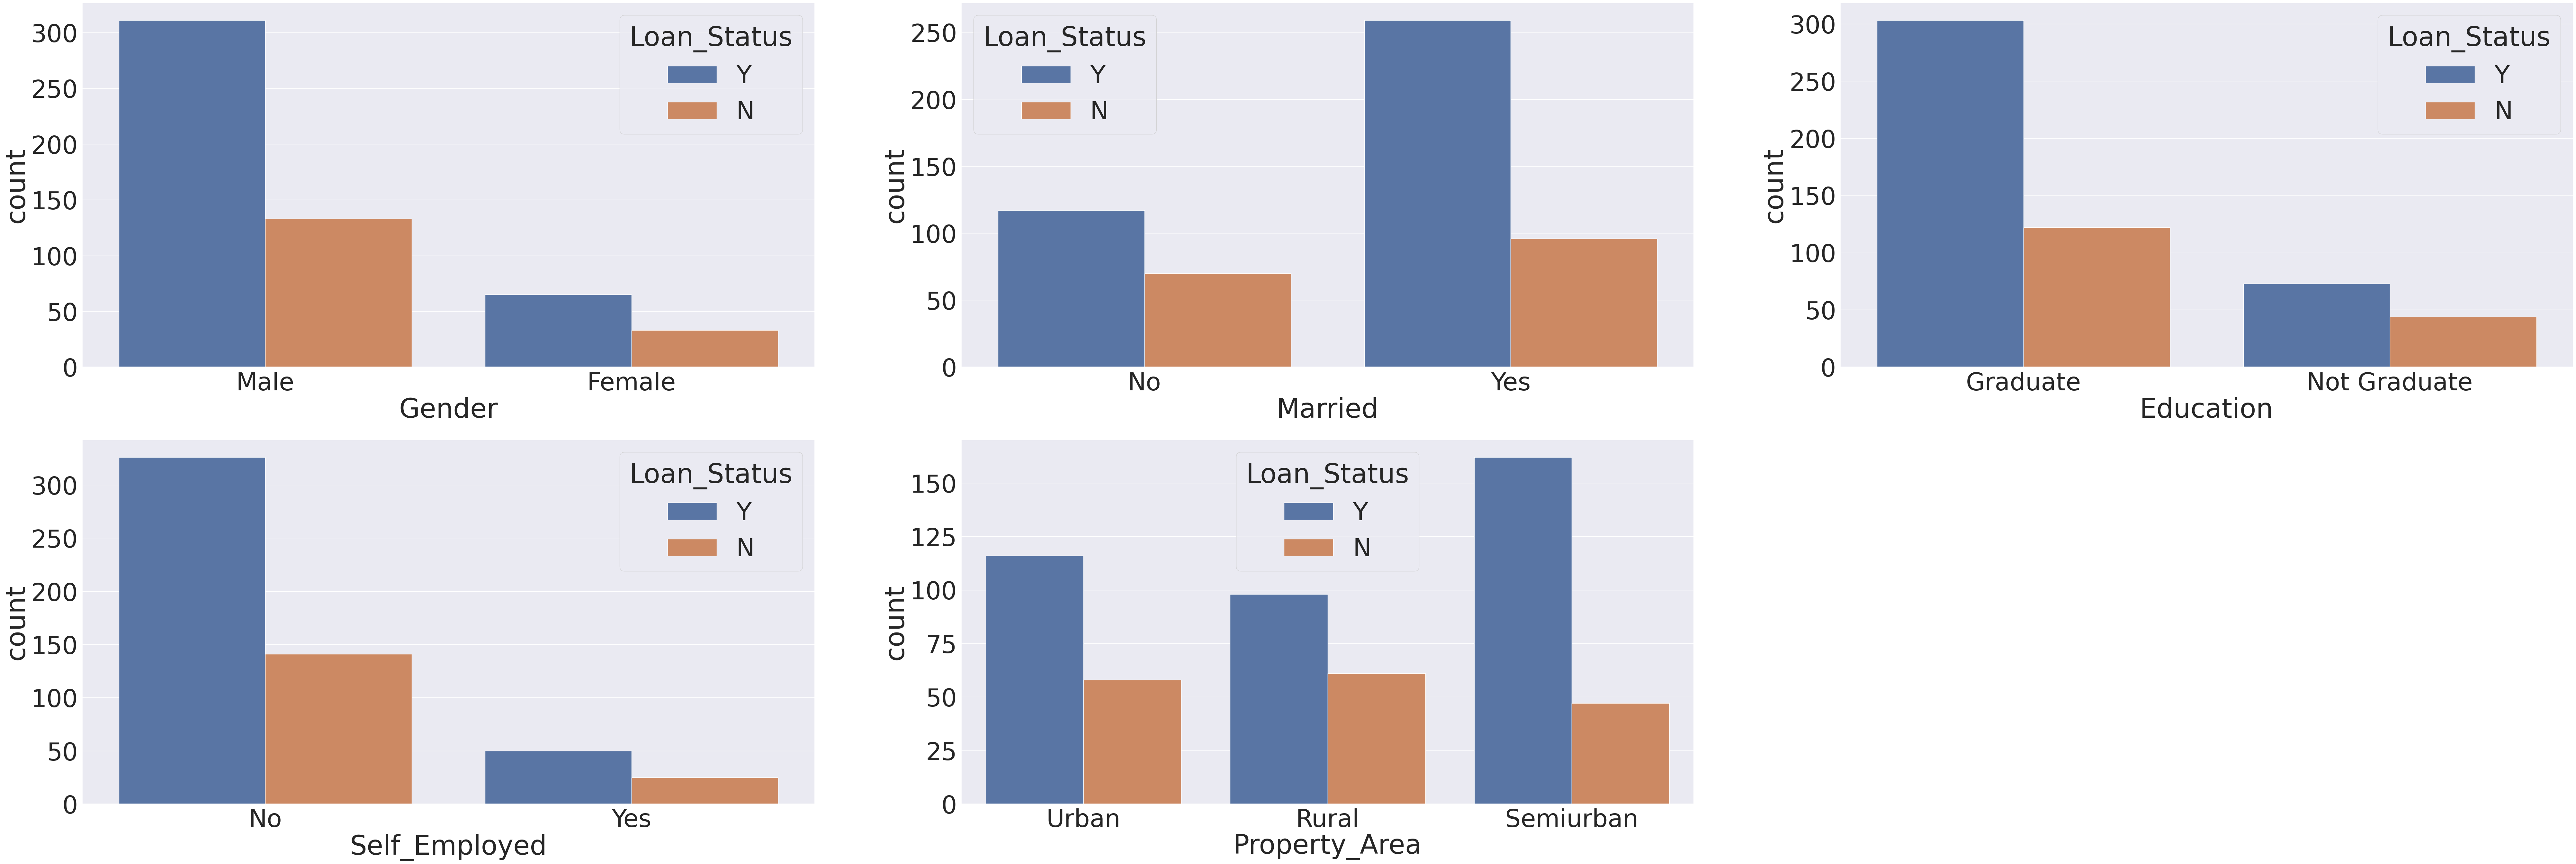

In [86]:
plt.figure(figsize=(100,50))
sns.set(font_scale=5)

plt.subplot(331)
sns.countplot(x='Gender', hue='Loan_Status', data = df)

plt.subplot(332)
sns.countplot(x='Married', hue='Loan_Status', data = df)

plt.subplot(333)
sns.countplot(x='Education', hue='Loan_Status', data = df)

plt.subplot(334)
sns.countplot(x='Self_Employed', hue='Loan_Status', data = df)

plt.subplot(335)
sns.countplot(x='Property_Area', hue='Loan_Status', data = df)


In [87]:
df['Loan_Status'] = df['Loan_Status'].replace({'Yes': 1, 'No': 0})
df['Loan_Status'].value_counts()

Y    376
N    166
Name: Loan_Status, dtype: int64

In [89]:
# prompt: map replace yes no 1 0 for married education and self-employed

df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})


0    467
1     75
Name: Self_Employed, dtype: int64

In [90]:
df['Married'].value_counts()


1    355
0    187
Name: Married, dtype: int64

In [93]:
df['Education'].value_counts()


1    425
0    117
Name: Education, dtype: int64

In [92]:
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [95]:
df['Property_Area'] = df['Property_Area'].replace({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [108]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [128]:
df['Dependents'] = df['Dependents'].replace({'3+': 3})
df['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [96]:
print(df['LoanAmount'].value_counts())
print(df['Loan_Amount_Term'].value_counts())
print(df['Credit_History'].value_counts())


146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.000000    425
0.000000     74
0.842199     43
Name: Credit_History, dtype: int64


In [99]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,Male,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,Male,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,Male,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,Male,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,Y


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [102]:
df.shape

(542, 13)

In [129]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [133]:
model = LogisticRegression()
model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
lr_predict=model.predict(X_test)
print('LRAccuracy = ', metrics.accuracy_score(lr_predict,y_test))

LRAccuracy =  0.7941176470588235


In [139]:
matrix = confusion_matrix(y_test,lr_predict)
print(f'Test set confusion matrix:\n{matrix}')

Test set confusion matrix:
[[19 26]
 [ 2 89]]


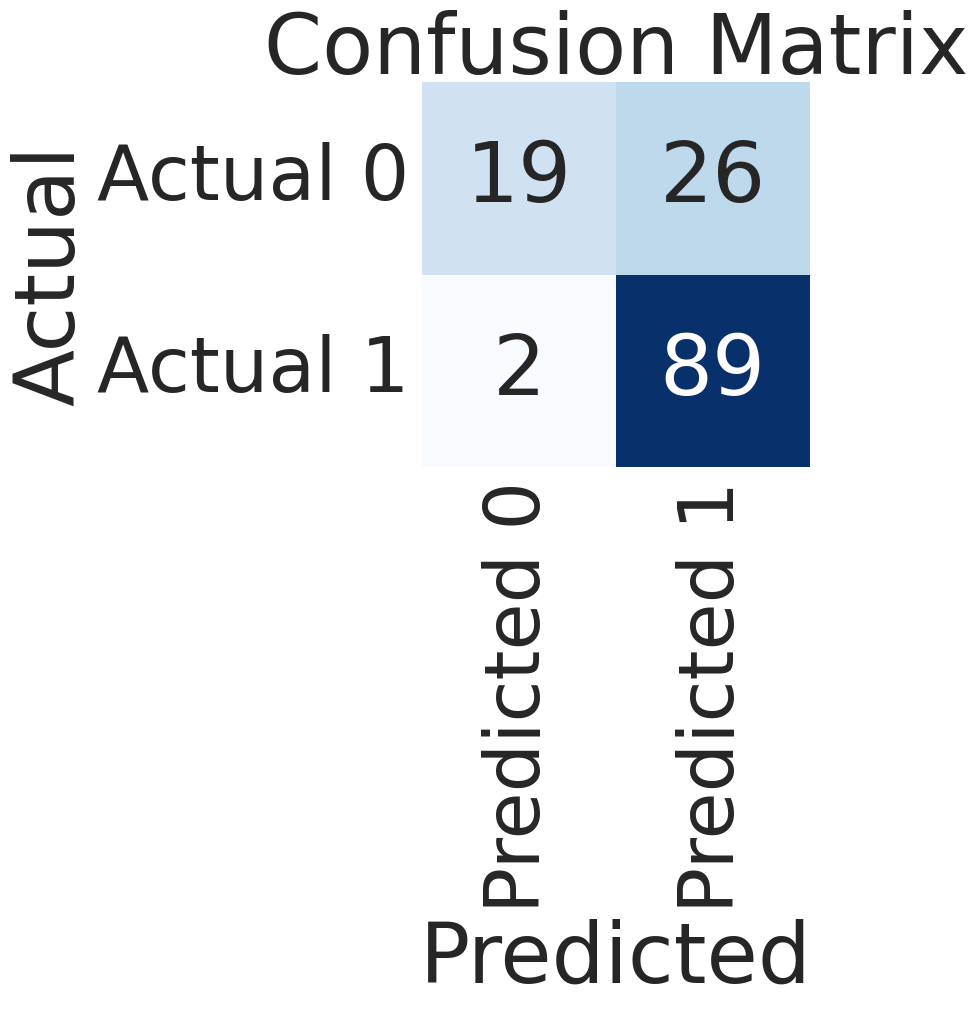

In [142]:
plt.figure(figsize=(5, 5))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()